In [1]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [60]:
import autogluon
import numpy as np
import pandas as pd

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [8]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [62]:
# df = pd.read_csv('/content/drive/MyDrive/train_full_2_upto10K.csv')
# test = pd.read_csv('/content/drive/MyDrive/test_full_2_upto5K.csv')

FileNotFoundError: ignored

In [74]:
df = pd.read_csv("/content/drive/MyDrive/train(5).csv")

In [75]:
train_data = TabularDataset(df)
# test_data = TabularDataset(test)

In [63]:
# train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
# subsample_size = len(train_data)
# train_data = train_data.sample(n=subsample_size, random_state=0)

In [76]:
train_data = df[:800]
test_data = df[800:]

In [77]:
test_data

,Unnamed: 0,text_status,content,languages,image_url_status,image_url,video_thumbnail_status,video_thumbnail_url,video_url_status,video_url,...,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,image_size,aspect_ratio,brightness,saturation,entropy
800,800,Has text,Full-time work with full-time benefits is here...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EcaY9EnXQAEbQts?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.000000,0.000000,24,"(680, 357)",1.904762,126.0,0.442237,7.332358
801,801,Has text,Join us on #Smallbizchat at 8:00 pm est. – Our...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/DlPQyJpXcAAbMrF?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,2,0,0.000000,0.000000,39,"(200, 200)",1.000000,83.0,0.206377,7.444163
802,802,Has text,Looking to secure your remote workforce? Learn...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EdoR_6VXYAE6gjH?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.084091,0.363636,26,"(680, 356)",1.910112,24.0,0.119459,4.604145
803,803,Has text,Me &amp; my housemates refusing to shave and f...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EYoAkVDWkAAqeFy?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.000000,1.000000,18,"(680, 680)",1.000000,88.0,0.383842,7.712834
804,804,Has text,Didn't get a chance to watch the #dotNET Desig...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EDP7y91XsAA5RmQ?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.234848,0.500000,28,"(680, 354)",1.920904,147.0,0.352155,5.253984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Has text,Ryan Switzer gearing up for his <mention> debu...,['ENGLISH'],Link does not exist,Image does not exist,Link exists and is accessible,https://pbs.twimg.com/ext_tw_video_thumb/10352...,Link exists and is accessible,https://video.twimg.com/ext_tw_video/103529795...,...,0,0,0.000000,0.000000,9,"(1200, 675)",1.777778,103.0,0.349357,7.653594
996,996,Has text,The current House-passed FAA reauthorization b...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/DeoAo7LWAAAWAsH?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.065341,0.238636,40,"(491, 116)",4.232759,210.0,0.360295,2.552281
997,997,Has text,For those who make the personal decision to tr...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EqQXc0iXYAA81db?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.300000,0.600000,32,"(680, 680)",1.000000,79.0,0.435320,7.548640
998,998,Has text,Save big on gadgets and don't miss out on thes...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dc40qOFX0AArp42?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.355238,0.545238,27,"(680, 384)",1.770833,143.0,0.447424,6.457335


In [78]:
time_limit = 300  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'rmse'  # specify your evaluation metric here
predictor = TabularPredictor(problem_type = 'regression', eval_metric = 'root_mean_squared_error',label='likes').fit(train_data, time_limit=time_limit, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20231214_104753"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 300 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231214_104753/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 84 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 216 seconds.
Starting full fit now with num_stack_level

In [79]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -2246.072533216369,
 'mean_squared_error': -5044841.824468996,
 'mean_absolute_error': -826.6933444595337,
 'r2': 0.09164807930650565,
 'pearsonr': 0.3354775873727384,
 'median_absolute_error': -349.74827575683594}

In [80]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-2246.072533,-1851.362926,root_mean_squared_error,0.717224,3.461471,183.032112,0.004643,0.000526,0.380099,3,True,9
1,LightGBMXT_BAG_L2,-2253.280352,-1970.447851,root_mean_squared_error,0.712582,3.460944,182.652013,0.250749,0.303110,47.544659,2,True,8
2,WeightedEnsemble_L2,-2270.570116,-1867.426041,root_mean_squared_error,0.353569,3.003776,104.634306,0.003779,0.000793,0.319469,2,True,7
3,LightGBM_BAG_L1,-2289.812951,-2040.079427,root_mean_squared_error,0.145685,0.234602,36.139168,0.145685,0.234602,36.139168,1,True,4
4,KNeighborsDist_BAG_L1,-2290.637351,-2034.763520,root_mean_squared_error,0.010355,0.015050,0.024406,0.010355,0.015050,0.024406,1,True,2
5,LightGBMXT_BAG_L1,-2321.514956,-2081.393014,root_mean_squared_error,0.104757,0.139153,30.768776,0.104757,0.139153,30.768776,1,True,3
6,CatBoost_BAG_L1,-2370.364230,-2013.006155,root_mean_squared_error,0.078328,2.229689,53.830297,0.078328,2.229689,53.830297,1,True,6
7,KNeighborsUnif_BAG_L1,-2524.954185,-2210.148513,root_mean_squared_error,0.007286,0.015698,0.023740,0.007286,0.015698,0.023740,1,True,1
8,RandomForestMSE_BAG_L1,-2560.673376,-2300.522840,root_mean_squared_error,0.115422,0.523643,14.320966,0.115422,0.523643,14.320966,1,True,5


In [81]:
predictions = predictor.predict(test_data)

In [82]:
# model_name = 'your_model_name'  # Replace with the actual model name
# model_predictions = predictions[model_name]

In [83]:
predictions

800    388.578430
801    204.499847
802    171.667648
803    400.620636
804    186.564667
          ...    
995    431.349365
996    467.348083
997    428.388245
998    261.612274
999    213.998779
Name: likes, Length: 200, dtype: float32

In [87]:
test_data['likes']

800      0
801      2
802      3
803      0
804     54
      ... 
995    283
996     35
997      0
998     14
999      0
Name: likes, Length: 200, dtype: int64

In [85]:
final_model_type = predictor.model_type
print("Final Model Type:", final_model_type)

AttributeError: ignored

In [86]:
import matplotlib.pyplot as plt

labels = test_data['likes']
if len(predictions) != len(labels):
    raise ValueError("Predictions and labels must have the same length")

sorted_indices = np.argsort(predictions)

# Use sorted indices to rearrange both predictions and labels arrays
sorted_predictions = predictions[sorted_indices]
sorted_labels = labels[sorted_indices]

# Create a scatter plot
plt.scatter(range(len(sorted_predictions)), sorted_predictions, label='Predictions', color='blue')

# Create a scatter plot for labels
plt.scatter(range(len(sorted_labels)), sorted_labels, label='Labels', color='red')

# Add a title
plt.title('Scatter Plot of Sorted Predictions vs. Sorted Labels')
plt.legend()
# Show the plot
plt.show()

KeyError: ignored

In [92]:
fin_preds.shape

(200,)

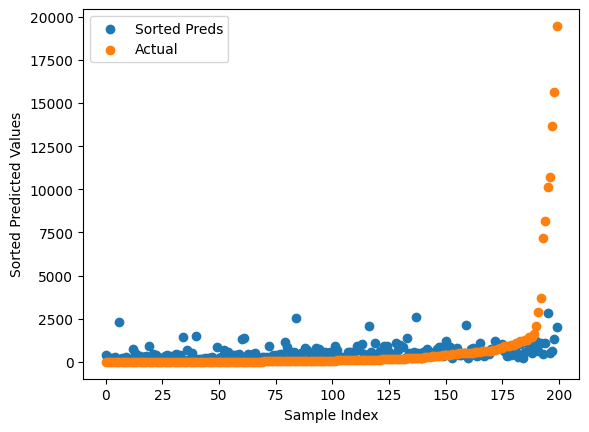

In [94]:
fin_preds = np.array(predictions)
labels = test_data['likes']

# Sort predicted values in increasing order
sorted_indices = np.argsort(labels.values).tolist()

fin_preds = fin_preds[sorted_indices]
labels = labels.values[sorted_indices]

# Create a scatter plot
plt.scatter(range(len(fin_preds)), fin_preds, label='Sorted Preds')
plt.scatter(range(len(labels)), labels, label='Actual')

# Add labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Sorted Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [46]:
labels = train_data['likes']
labels

299      78
500       0
303    3395
40      421
495     103
       ... 
763      14
192     308
629       0
559     260
684     281
Name: likes, Length: 800, dtype: int64

In [48]:
labels

299      78
500       0
303    3395
40      421
495     103
       ... 
763      14
192     308
629       0
559     260
684     281
Name: likes, Length: 800, dtype: int64

In [97]:
import plotly.graph_objects as go

# Sort predicted values in increasing order based on labels
sorted_indices = np.argsort(predictions.values).tolist()
sorted_predictions = predictions.values[sorted_indices]
sorted_labels = labels[sorted_indices]

# Create a scatter plot using Plotly
fig = go.Figure()

# Scatter plot for sorted predictions
fig.add_trace(go.Scatter(x=np.arange(len(sorted_predictions)), y=sorted_predictions, mode='markers', name='Sorted Predictions'))

# Scatter plot for labels
fig.add_trace(go.Scatter(x=np.arange(len(sorted_labels)), y=sorted_labels, mode='markers', name='Actual Labels'))

# Set axis labels and plot title
fig.update_layout(title='Scatter Plot of Sorted Predictions and Actual Labels',
                  xaxis_title='Sample Index',
                  yaxis_title='Values')

# Show the plot
fig.show()


In [96]:
sorted_predictions

array([ 109.3968  ,  111.612236,  112.05275 ,  116.5324  ,  136.6278  ,
        155.612   ,  155.69583 ,  155.82968 ,  157.46309 ,  160.61786 ,
        162.52957 ,  165.14023 ,  171.52821 ,  171.66765 ,  177.5877  ,
        183.6727  ,  186.56467 ,  190.0408  ,  193.30734 ,  194.37735 ,
        203.74307 ,  204.49985 ,  204.58102 ,  213.99878 ,  214.21198 ,
        217.06107 ,  221.136   ,  223.00717 ,  224.84793 ,  227.98285 ,
        228.1564  ,  229.14641 ,  231.13649 ,  234.8605  ,  235.90054 ,
        237.92691 ,  239.31284 ,  242.47751 ,  243.93922 ,  244.68097 ,
        247.24501 ,  249.96362 ,  251.65594 ,  258.37326 ,  261.61227 ,
        261.68115 ,  261.75958 ,  262.48178 ,  270.05252 ,  270.75397 ,
        270.78265 ,  271.58075 ,  278.42114 ,  281.52664 ,  285.3266  ,
        286.8543  ,  301.65997 ,  304.1631  ,  305.2309  ,  309.07172 ,
        311.17413 ,  317.30725 ,  317.6604  ,  328.9661  ,  328.98434 ,
        330.66248 ,  331.9898  ,  336.3526  ,  343.09274 ,  351.

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(sorted_labels, sorted_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(sorted_labels, sorted_predictions)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 score:{r2}')

Root Mean Squared Error (RMSE): 2440.266659034023
R2 score:-0.07221321948968984


In [61]:
train_data.columns

Index(['Unnamed: 0', 'text_status', 'content', 'languages', 'image_url_status',
       'image_url', 'video_thumbnail_status', 'video_thumbnail_url',
       'video_url_status', 'video_url', 'video_bitrate', 'video_duration',
       'video_views', 'gif_thumbnail_status', 'gif_thumbnail_url',
       'gif_url_status', 'gif_url', 'gif_bitrate', 'year', 'month',
       'day_of_year', 'day_of_week', 'date', 'username', 'inferred company',
       'likes', 'media', 'is_url_active', 'media_type', 'emoji_count',
       'hastag_count', 'uppercase_count', 'at_count', 'sentiment_score',
       'subjectivity_score', 'word_count', 'image_size', 'aspect_ratio',
       'brightness', 'saturation', 'entropy'],
      dtype='object')

In [99]:
from sklearn.ensemble import RandomForestRegressor

if isinstance(predictor, RandomForestRegressor):
    # Access the feature importances (weights) of the model
    feature_importances = predictor.feature_importances_
    print("Feature Importances:", feature_importances)
else:
    print("This model type does not provide direct access to weights.")


This model type does not provide direct access to weights.


In [104]:
ensemble_weights = predictor.info['learner']['weighted_ensemble']['learners']
print("Ensemble Weights:", ensemble_weights)

TypeError: ignored

In [103]:
predictor.info

<bound method TabularPredictor.info of <autogluon.tabular.predictor.predictor.TabularPredictor object at 0x7aa45535dd20>>

In [108]:
predictor.save("model_checkpoint")

In [121]:
from autogluon.tabular import TabularPredictor

# Load a trained weighted ensemble model
model = TabularPredictor.load("/content/AutogluonModels/ag-20231214_104753/models")

# Get the L3 weights
l3_weights = model.weighted_ensemble_model.ensemble_weights

print(l3_weights)

This means that the predictor was fit in a version `<=0.3.1`.


FileNotFoundError: ignored

In [122]:
df

,Unnamed: 0,text_status,content,languages,image_url_status,image_url,video_thumbnail_status,video_thumbnail_url,video_url_status,video_url,...,uppercase_count,at_count,sentiment_score,subjectivity_score,word_count,image_size,aspect_ratio,brightness,saturation,entropy
0,0,Has text,"Spend your weekend morning with a Ham, Egg, an...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.175000,0.325000,29,"(680, 680)",1.000000,199.0,0.396018,6.947461
1,1,Has text,Watch rapper <mention> freestyle for over an H...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.000000,0.000000,10,"(680, 409)",1.662592,63.0,0.396177,7.149406
2,2,Has text,Canadian Armenian community demands ban on mil...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EjG2s4aXgAMNM1o?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,-0.100000,0.100000,14,"(460, 259)",1.776062,140.0,0.277998,7.376470
3,3,Has text,"1st in Europe to be devastated by COVID-19, It...",['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EjPaVniX0AAaWLJ?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.500000,0.900000,22,"(620, 349)",1.776504,116.0,0.197730,7.629375
4,4,Has text,An 85-year-old primary school in Shanghai has ...,['ENGLISH'],Link does not exist,Image does not exist,Link exists and is accessible,https://pbs.twimg.com/amplify_video_thumb/1322...,Link exists and is accessible,https://video.twimg.com/amplify_video/13223822...,...,0,0,0.268182,0.477273,28,"(1200, 675)",1.777778,131.0,0.174339,7.724996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Has text,Ryan Switzer gearing up for his <mention> debu...,['ENGLISH'],Link does not exist,Image does not exist,Link exists and is accessible,https://pbs.twimg.com/ext_tw_video_thumb/10352...,Link exists and is accessible,https://video.twimg.com/ext_tw_video/103529795...,...,0,0,0.000000,0.000000,9,"(1200, 675)",1.777778,103.0,0.349357,7.653594
996,996,Has text,The current House-passed FAA reauthorization b...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/DeoAo7LWAAAWAsH?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.065341,0.238636,40,"(491, 116)",4.232759,210.0,0.360295,2.552281
997,997,Has text,For those who make the personal decision to tr...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/EqQXc0iXYAA81db?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,0,0,0.300000,0.600000,32,"(680, 680)",1.000000,79.0,0.435320,7.548640
998,998,Has text,Save big on gadgets and don't miss out on thes...,['ENGLISH'],Link exists and is accessible,https://pbs.twimg.com/media/Dc40qOFX0AArp42?fo...,Link does not exist,Video thumbnail does not exist,Link does not exist,Video does not exist,...,1,0,0.355238,0.545238,27,"(680, 384)",1.770833,143.0,0.447424,6.457335


In [129]:
df1 = df

In [125]:
df1.columns

Index(['Unnamed: 0', 'text_status', 'content', 'languages', 'image_url_status',
       'image_url', 'video_thumbnail_status', 'video_thumbnail_url',
       'video_url_status', 'video_url', 'video_bitrate', 'video_duration',
       'video_views', 'gif_thumbnail_status', 'gif_thumbnail_url',
       'gif_url_status', 'gif_url', 'gif_bitrate', 'year', 'month',
       'day_of_year', 'day_of_week', 'date', 'username', 'inferred company',
       'likes', 'media', 'is_url_active', 'media_type', 'emoji_count',
       'hastag_count', 'uppercase_count', 'at_count', 'sentiment_score',
       'subjectivity_score', 'word_count', 'image_size', 'aspect_ratio',
       'brightness', 'saturation', 'entropy'],
      dtype='object')

In [128]:
df1.drop(columns = 'text_status', inplace = True)
df1.drop(columns = 'text', inplace = True)
df1.drop(columns = 'languages', inplace = True)
df1.drop(columns = '', inplace = True)

KeyError: ignored

In [127]:
df1.corr()

ValueError: ignored